### Distribution of distances for the whole protein (i.e., all observed distances, number of observations == number of edges)

In [9]:
import pandas as pd
import numpy as np
from plotnine import *

%matplotlib notebook

In [12]:
import os
perlout_path = os.path.join(os.getcwd(), "output")
dir_path = os.path.join(perlout_path, "flu", "nsyn", "countnorm") 
print(dir_path)

C:\Users\weidewind\workspace\aspenclust\output\flu\nsyn\countnorm


[0.0244, 0.0487, 0.0731, 0.0974, 0.122, 0.146, 0.17, 0.195, 0.219, 0.244, 0.268, 0.292]


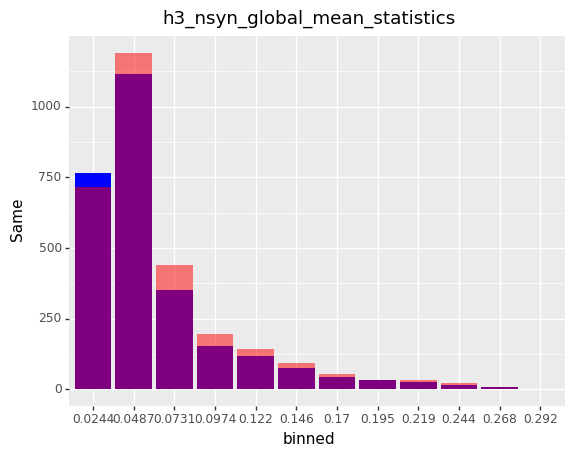

In [11]:
def hist_from_global_dist(dirpath, filename):
    file = os.path.join(dirpath, filename)
    print(file)
    f = open(file, "r")
    lines = f.readlines()
    df = pd.DataFrame()
    for i in range(len(lines)):
        l = lines[i]
        if l.startswith("Hist"):
            l = lines[i+1]
            header = l.strip().split(',')
            df = pd.DataFrame(columns = header, dtype = "float")
            t = 1
            i = i+2
            l = lines[i]
            while not (l.startswith("Sum")):
                df.loc[t] = l.strip().split(',')
                i = i+1
                t = t+1
                l = lines[i]
            break
    df = df.apply(pd.to_numeric)
    df['binned'] = pd.cut(df['Distance'],12)
    labels = list(map(lambda x: x.right, np.unique(df['binned'])))
    print(labels)
    df['binned'] = pd.cut(df['Distance'],12, labels = labels)
    p = ggplot(df)+geom_bar(aes(y="Same",x="binned"), stat="identity", fill = "blue")+ \
    geom_bar(aes(y = "Diff",x="binned"), stat="identity", alpha = 0.5, fill = "red") + ggtitle(filename)
    p.draw()
    
filename = "h3_nsyn_global_mean_statistics"
hist_from_global_dist(dir_path, filename=filename)

### Distribution of distances for individual sites (i.e., grouped distances, number of observations == number of sites suitable for analysis ):

     >site  same_mean  diff_mean  mean_difference  pvalue
0        2   0.073240   0.214612         0.141372  0.0481
1        3   0.031890   0.028762        -0.003128  0.7115
2        4   0.066019   0.141715         0.075695  0.0420
3        5   0.081862   0.049262        -0.032600  0.9008
4        6   0.032980   0.019106        -0.013874  1.0000
..     ...        ...        ...              ...     ...
335    528   0.049982   0.087022         0.037040  0.3253
337    536   0.033112   0.050842         0.017730  0.3321
347    550   0.029077   0.046470         0.017392  0.2476
352    562   0.033871   0.040459         0.006588  0.2307
353    563   0.012413   0.010124        -0.002289  1.0000

[136 rows x 5 columns]


<IPython.core.display.Javascript object>


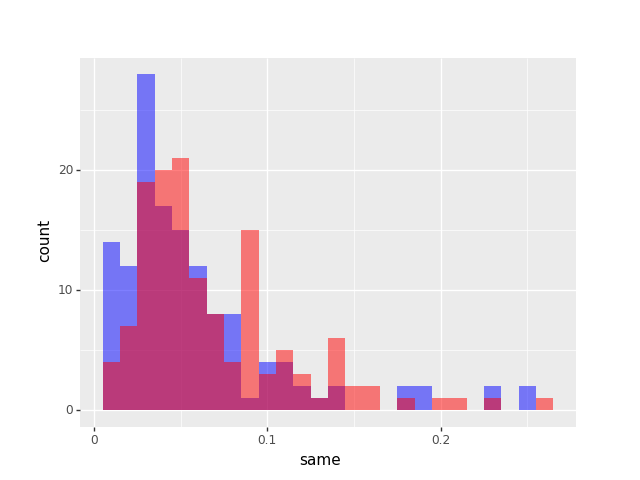

<IPython.core.display.Javascript object>


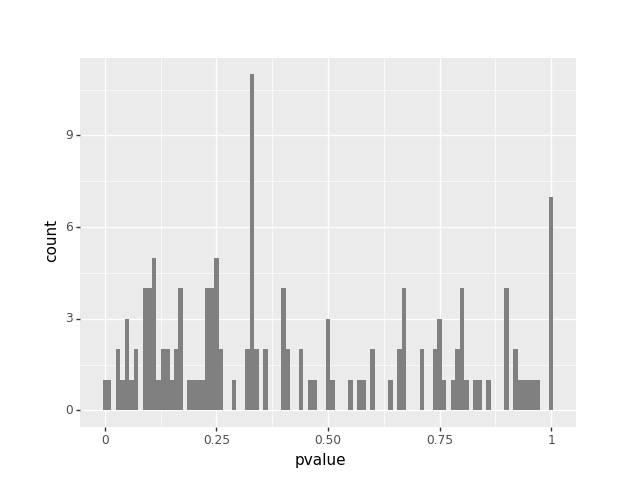

     >site  same_median  diff_median  median_difference  pvalue
0        2     0.073240     0.225754           0.152514  0.0514
1        3     0.040215     0.024849          -0.015366  0.8959
2        4     0.038977     0.174301           0.135324  0.0089
3        5     0.114306     0.039576          -0.074730  1.0000
4        6     0.040263     0.011477          -0.028786  0.9006
..     ...          ...          ...                ...     ...
335    528     0.049982     0.087022           0.037040  0.3395
337    536     0.033112     0.050842           0.017730  0.3363
347    550     0.038371     0.041560           0.003189  0.2483
352    562     0.013704     0.031712           0.018008  0.1088
353    563     0.012413     0.010124          -0.002289  1.0000

[136 rows x 5 columns]


<IPython.core.display.Javascript object>


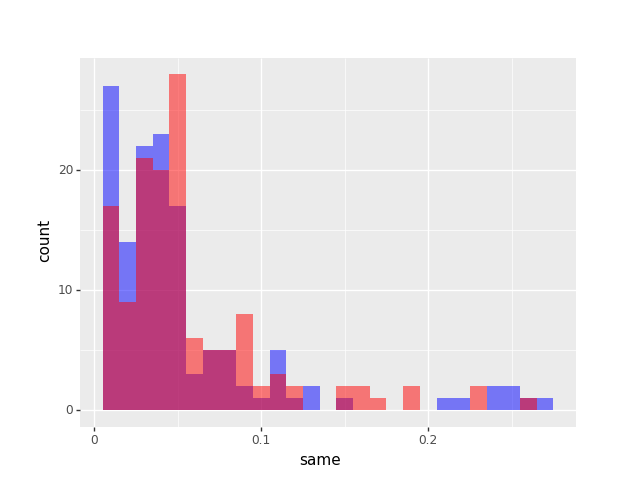

<IPython.core.display.Javascript object>


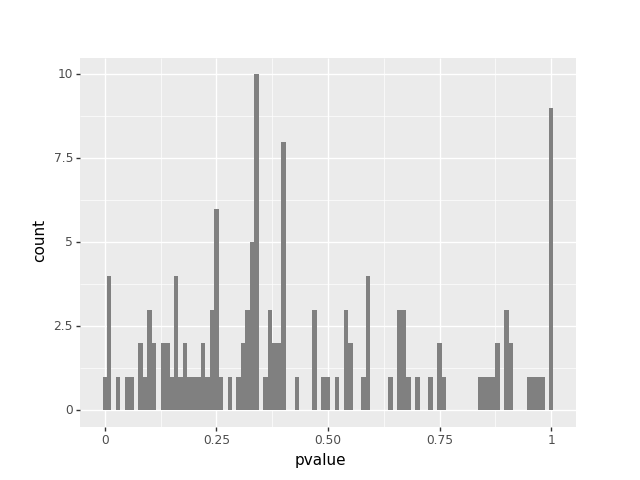

In [59]:
def hist_from_single_sites_averages(dirpath, filename):
    file = os.path.join(dirpath, filename)
    print(file)
    f = open(file, "r")
    lines = f.readlines()
    df = pd.DataFrame(columns = ["a","b","c","d","e"],dtype = "float")
    header = []
    t = 0
    for i in range(len(lines)):
        l = lines[i]
        if l.startswith(">site"):
            header = l.strip().split('\t')
            df.columns = header
            l = lines[i+1]
            df.loc[t] = l.strip().split('\t')[0:5]
            t = t+1
    df = df.apply(pd.to_numeric)

    # discard sites with undefined stats ( mean of Gd or Gp == 0 )
    df = df[df.iloc[:,1] >0]
    print(df)
    df.columns = ["site", "same", "diff", "stat", "pvalue"]
    p = ggplot(df)+geom_histogram(aes("same"), fill = "blue", binwidth = 0.01, alpha = 0.5)+\
    geom_histogram(aes("diff"), fill = "red", binwidth = 0.01, alpha = 0.5)+ggtitle(filename)
    p.draw()
    pv = ggplot(df)+geom_histogram(aes("pvalue"), fill = "gray", binwidth = 0.01)+ggtitle(filename)
    pv.draw()
    return (df)

dfmean = hist_from_single_sites_averages(dir_path, filename="h1_nsyn_sites_mean_statistics")
dfmedian = hist_from_single_sites_averages(dir_path, filename="h1_nsyn_sites_median_statistics")

### Statistics (diff-same) distribution for simulations 1 (shuffle substitutions for each ancestor at each site ([A->C(p=0.3),A->T(p=0.1)] are moved to another branch with A->.. substitution(s) )): DIFF<SAME for countnorm! DIFF==SAME for weightnorm

C:\Users\weidewind\workspace\aspenclust\output\flu\nsyn\countnorm\h1_nsyn_global_mean_statistics
boot 0.061956647044013 0.0658672512733877 -0.00391060422937466 

boot 0.0616147008154828 0.0616400225345872 -2.53217191043612e-05 



c:\users\weidewind\appdata\local\continuum\anaconda3\envs\aspen_env\lib\site-packages\plotnine\layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


C:\Users\weidewind\workspace\aspenclust\output\flu\nsyn\countnorm\h1_nsyn_global_median_statistics
boot 0.039611 0.040902 -0.001291 

boot 0.040983 0.042034 -0.001051 



c:\users\weidewind\appdata\local\continuum\anaconda3\envs\aspen_env\lib\site-packages\plotnine\layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


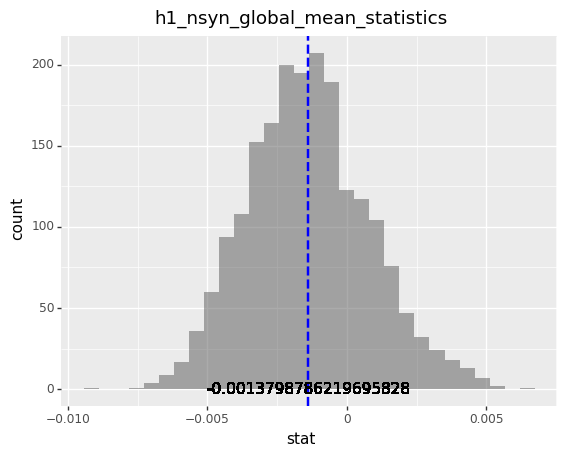

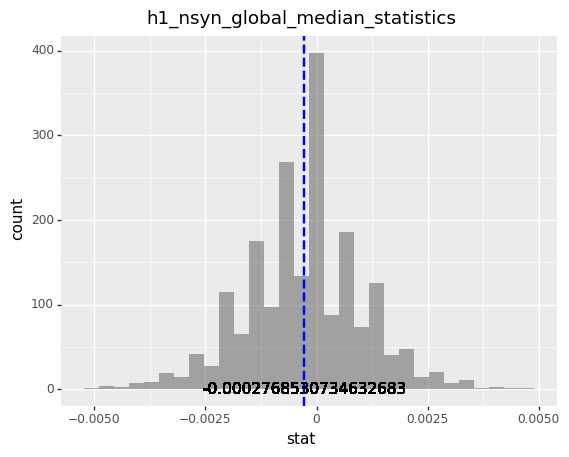

In [13]:
def boothist_from_global_dist(dirpath, filename, maxnum):
    file = os.path.join(dirpath, filename)
    print(file)
    f = open(file, "r")
    lines = f.readlines()
    sims = pd.DataFrame(columns=["diff","same","stat"], dtype = "float")
    n = 0
    for i in range(len(lines)):
        l = lines[i]
        if l.startswith("boot"):
            while (l.startswith("boot")):
                sims.loc[n] = l.strip().split(' ')[1:]
                i = i+1
                n = n+1
                if n%1000 == 0:
                    print(l)
                l = lines[i]
                if n > maxnum:
                    break
            break
    sims = sims.apply(pd.to_numeric)
    mean = np.mean(sims["stat"])
    q = ggplot(sims, aes(x="stat"))+geom_histogram(bins=30, alpha = 0.5)+ \
    geom_vline(aes(xintercept=mean), color="blue", linetype="dashed", size=1)+ \
    geom_text(aes(mean,0,label = mean, vjust = 1))+ ggtitle(filename)
#+geom_histogram(binwidth=0.005, fill = "blue")
    q.draw()
      
boothist_from_global_dist(dir_path, filename="h1_nsyn_global_mean_statistics", maxnum = 2000)
boothist_from_global_dist(dir_path, filename="h1_nsyn_global_median_statistics", maxnum = 2000)

C:\Users\weidewind\workspace\aspenclust\output\parenttest\nsyn\likelihoods\countnorm\h1_nsyn_global_mean_statistics
boot 0.062440388500081 0.0681352336284235 -0.00569484512834244 

boot 0.0607776839224532 0.0642797249271291 -0.00350204100467588 



c:\users\weidewind\appdata\local\continuum\anaconda3\envs\aspen_env\lib\site-packages\plotnine\layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


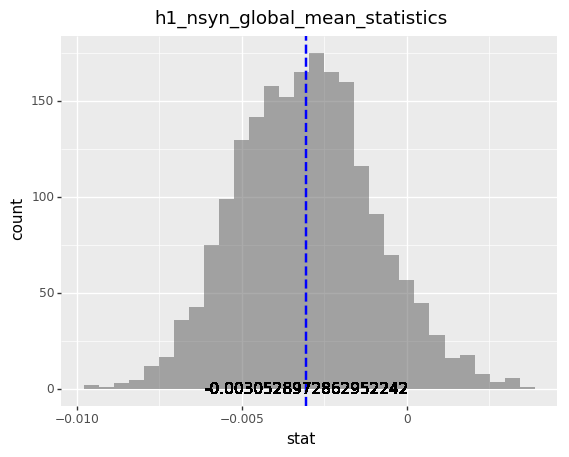

In [18]:
newdirp = os.path.join(perlout_path, "parenttest", "nsyn", "likelihoods", "countnorm")
boothist_from_global_dist(newdirp, filename="h1_nsyn_global_mean_statistics", maxnum = 2000)

C:\Users\weidewind\workspace\aspenclust\output\flu\nsyn\weightnorm\h1_nsyn_global_mean_statistics
boot 0.077124157195405 0.0740018676308189 0.00312228956458618 

boot 0.0749001848919595 0.0761795677905221 -0.00127938289856262 



c:\users\weidewind\appdata\local\continuum\anaconda3\envs\aspen_env\lib\site-packages\plotnine\layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


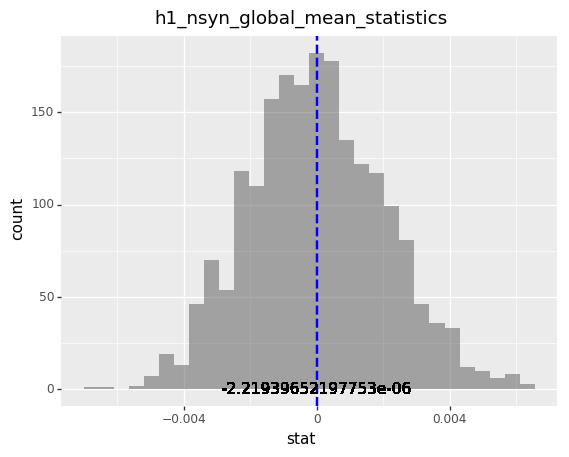

In [16]:
newdirp = os.path.join(perlout_path, "flu", "nsyn",  "weightnorm")
boothist_from_global_dist(newdirp, filename="h1_nsyn_global_mean_statistics", maxnum = 2000)

### Distribution of pvalues for evolver fakes (same as for evopoisson)

C:\Users\weidewind\workspace\aspenclust\output\evolver_h3\evolvertest\nsyn\mostlikely\weightnorm\global_results_mean


c:\users\weidewind\appdata\local\continuum\anaconda3\envs\aspen_env\lib\site-packages\plotnine\layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


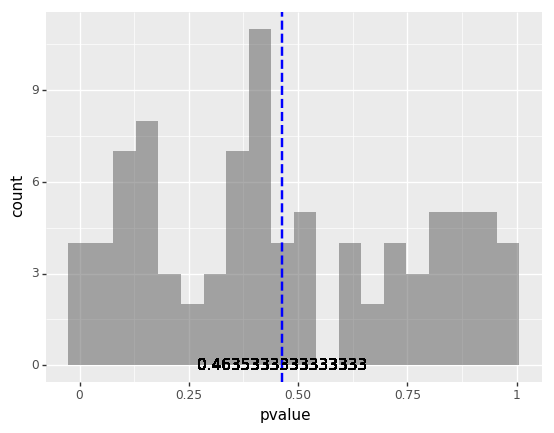

In [27]:
def fake_pvalue_global_hist(dirpath, filename):
    file = os.path.join(dirpath, filename)
    print(file)
    f = open(file, "r")
    lines = f.readlines()
    fakes = pd.DataFrame(columns=["fake_id","same","diff","stat", "pvalue"], dtype = "float")
    n = 0
    for i in range(len(lines)):
        l = lines[i]
        fakes.loc[i] = l.strip().split('	')
    fakes = fakes.apply(pd.to_numeric)
    mean = np.mean(fakes["pvalue"])
    bins = 20
    horline = fakes.shape[0]/bins
    q = ggplot(fakes, aes(x="pvalue"))+geom_histogram(bins=bins, alpha = 0.5)+\
    geom_vline(aes(xintercept=mean), color="blue", linetype="dashed", size=1)+ \
    geom_hline(aes(yintercept=horline), color="black", linetype="dashed", size=1)+ \
    geom_text(aes(mean,0,label = mean, vjust = 1)) + ggtitle("Evolver fakes global")
    q.draw()
    
newdirp = os.path.join(perlout_path, "evolver_h3","evolvertest","nsyn", "mostlikely", "weightnorm")
filename = "global_results_mean"
fake_pvalue_global_hist(newdirp, filename)

C:\Users\weidewind\workspace\aspenclust\output\evolver_h3\evolvertest\nsyn\mostlikely\weightnorm\sites_results_mean_long


c:\users\weidewind\appdata\local\continuum\anaconda3\envs\aspen_env\lib\site-packages\plotnine\layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


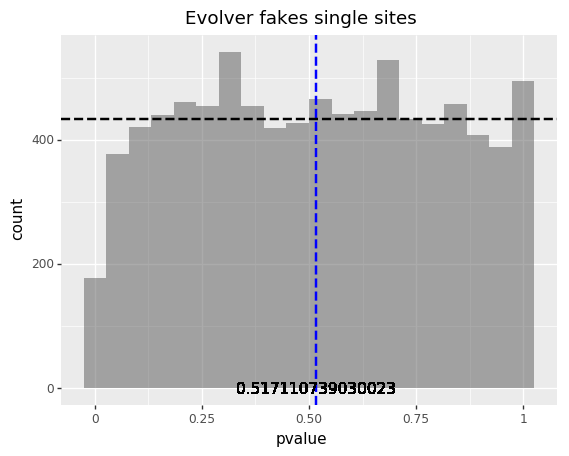

In [133]:
def pvalue_sites_hist(dirpath, filename, title):
    file = os.path.join(dirpath, filename)
    print(file)
    f = open(file, "r")
    lines = f.readlines()
    fakes = pd.DataFrame(columns=["fakeno", "site","same","diff","stat", "pvalue", "subs"], dtype = "float")
    n = 0
    for i in range(len(lines)): #
        l = lines[i]
        splitter = l.strip().split('	')
        if len(splitter) == 6:
               fakes.loc[n] = [0]+splitter 
        else:
            fakes.loc[n] = splitter #l.strip().split('	')[:7]
        n = n+1
    cols = fakes.columns.drop('subs')
    fakes[cols] = fakes[cols].apply(pd.to_numeric)
    fakes = fakes[(fakes["same"] > 0)]
    mean = np.mean(fakes["pvalue"])
    bins = 20
    horline = fakes.shape[0]/bins
    q = ggplot(fakes, aes(x="pvalue"))+geom_histogram(bins=bins, alpha = 0.5)+\
    geom_vline(aes(xintercept=mean), color="blue", linetype="dashed", size=1)+ \
    geom_hline(aes(yintercept=horline), color="black", linetype="dashed", size=1)+ \
    geom_text(aes(mean,0,label = mean, vjust = 1)) + ggtitle(title)
    q.draw()
    return(fakes)
    
newdirp = os.path.join(perlout_path, "evolver_h3","evolvertest","nsyn", "mostlikely", "weightnorm")
filename = "sites_results_mean_long"
fakes=pvalue_sites_hist(newdirp, filename, title = "Evolver fakes single sites")

C:\Users\weidewind\workspace\aspenclust\output\parenttest\nsyn\likelihoods\weightnorm\h3_sites_results_mean


c:\users\weidewind\appdata\local\continuum\anaconda3\envs\aspen_env\lib\site-packages\plotnine\layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


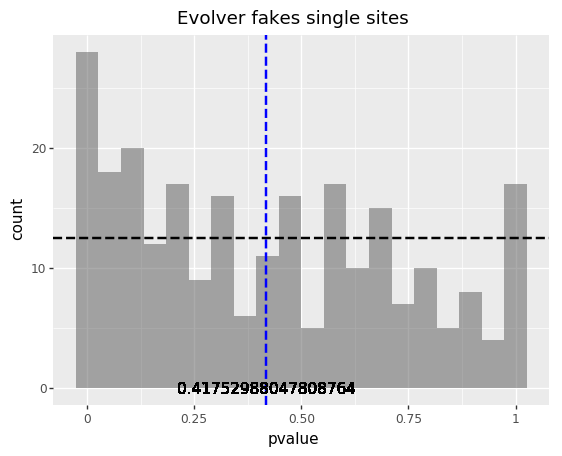

In [134]:
newdirp = os.path.join(perlout_path, "parenttest","nsyn","likelihoods","weightnorm")
filename = "h3_sites_results_mean"
real=pvalue_sites_hist(newdirp, filename, title = "H3 single sites")

      fakeno  site      same      diff      stat  pvalue  \
16         1    17  0.036936  0.049268  0.012332   0.006   
41         1    42  0.034366  0.098550  0.064184   0.006   
457        5    64  0.043546  0.055649  0.012103   0.008   
473        5    80  0.031496  0.072063  0.040567   0.008   
780        8    92  0.027519  0.033294  0.005775   0.004   
...      ...   ...       ...       ...       ...     ...   
9413      96    50  0.029418  0.036658  0.007240   0.001   
9470      97     7  0.037107  0.049879  0.012773   0.009   
9563      97   100  0.019169  0.031573  0.012405   0.001   
9641      98    78  0.025854  0.031967  0.006113   0.007   
9733      99    71  0.033648  0.062845  0.029197   0.000   

                                                   subs  nonlon  subnum  \
16                             CGA*7,CGAL4,CGAP1,CGAQ20      31      32   
41                                    ACAA8,ACAP2,ACAS3      13      13   
457          ATCV1;GTCA6,GTCD2,GTCF3,GTCG1,GTCI18,GTCL

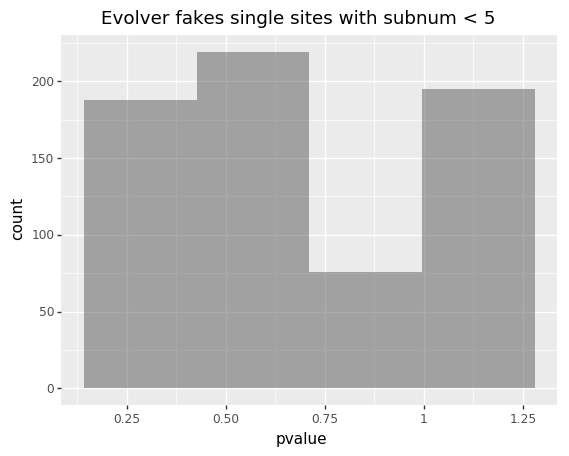

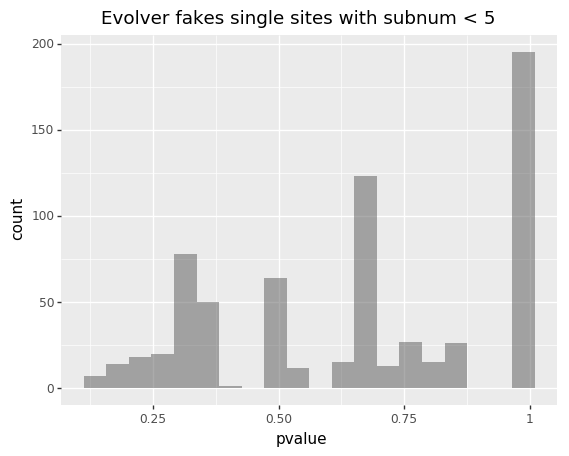

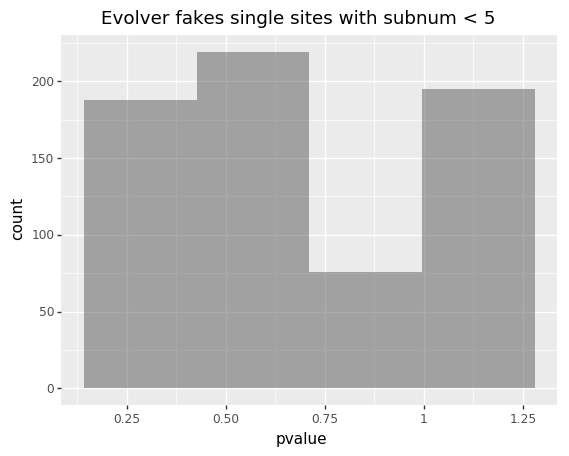

In [132]:
def num_of_nonlonely(s):
    num = 0
    clusters = s.split(";")
    for c in clusters:
        types = c.split(",")
        if len(types) > 1:
            for t in types:
                n = int(t[4:])
                if n>1:
                    num = num+n
    return num

def num_of_meaningful_subs(s):
    num = 0
    clusters = s.split(";")
    for c in clusters:
        types = c.split(",")
        if len(types) > 1:
            tnum=0
            for t in types:
                n = int(t[4:])
                tnum = tnum+n
            if tnum > len(types):
                num = num+tnum
    return num

def size_of_the_largest_cluster(s):
    num = 0
    clusters = s.split(";")
    for c in clusters:
        types = c.split(",")
        if len(types) > 1:
            tnum=0
            for t in types:
                n = int(t[4:])
                tnum = tnum+n
            if tnum > len(types):
                num = max(num,tnum)
    return num

nonlon = [num_of_nonlonely(s) for s in fakes["subs"]]
subnum = [num_of_meaningful_subs(s) for s in fakes["subs"]]
maxsize = [size_of_the_largest_cluster(s) for s in fakes["subs"]]
fakes["nonlon"] = nonlon
fakes["subnum"] = subnum
fakes["maxsize"] = maxsize
print(fakes[fakes["pvalue"]<0.01])
#q = ggplot(fakes)+geom_point(aes(x="subnum",y = "pvalue", color = "stat"), alpha = 0.3)
#q.draw()
best = fakes[fakes["pvalue"]<0.1]
mid = fakes[(fakes["pvalue"]<0.5) & (fakes["pvalue"]>0.4)] 
sc = scale_colour_gradientn(colors = ( "red", "yellow","green","blue"), limits=(min(fakes["stat"]), max(fakes["stat"])))
# q = ggplot(fakes[fakes["subnum"]>10])+geom_point(aes(x="subnum",y = "pvalue", color = "stat"), alpha = 0.3)+sc
# q.draw()
# q = ggplot(fakes[fakes["subnum"]<=10])+geom_point(aes(x="subnum",y = "pvalue", color = "stat"), alpha = 0.3)+sc
# q.draw()
# q = ggplot(fakes)+geom_point(aes(x="diff",y = "pvalue", color = "stat"), alpha = 0.3)+sc
# q.draw()
# q = ggplot(best)+geom_point(aes(x="maxsize",y = "pvalue", color = "stat"), alpha = 0.3)+sc
# q.draw()
# q = ggplot(best)+geom_histogram(aes(x="subnum"), alpha = 0.3, bins =20, fill = "red")+\
# geom_histogram( aes(x="subnum"),data = mid, alpha = 0.3, bins =20)+ggtitle("Best")
# q.draw()
# q = ggplot(fakes[fakes["subnum"]>10], aes(x="pvalue"))+geom_histogram(bins=20, alpha = 0.5)+\
# ggtitle("Evolver fakes single sites with subnum > 10 ")
# q.draw()
# q = ggplot(fakes[fakes["maxsize"]>10], aes(x="pvalue"))+geom_histogram(bins=20, alpha = 0.5)+\
# ggtitle("Evolver fakes single sites with maxsize > 10 ")
# q.draw()
q = ggplot(fakes[fakes["subnum"]<5], aes(x="pvalue"))+geom_histogram(bins=20, alpha = 0.5)+\
ggtitle("Evolver fakes single sites with subnum < 5 ")
q.draw()
q = ggplot(fakes[fakes["subnum"]<5], aes(x="pvalue"))+geom_histogram(bins=4, alpha = 0.5)+\
ggtitle("Evolver fakes single sites with subnum < 5 ")
q.draw()


In [111]:
fakes[fakes["pvalue"] < 0.01]

,fakeno,site,same,diff,stat,pvalue,subs,nonlon,subnum,maxsize
16,1,17,0.036936,0.049268,0.012332,0.006,"CGA*7,CGAL4,CGAP1,CGAQ20",31,32,32
41,1,42,0.034366,0.098550,0.064184,0.006,"ACAA8,ACAP2,ACAS3",13,13,13
457,5,64,0.043546,0.055649,0.012103,0.008,"ATCV1;GTCA6,GTCD2,GTCF3,GTCG1,GTCI18,GTCL3",32,33,33
473,5,80,0.031496,0.072063,0.040567,0.008,"AAA*1,AAAN2,AAAR4",6,7,7
780,8,92,0.027519,0.033294,0.005775,0.004,"GGCA1,GGCD15,GGCS18,GGCV2",35,36,36
916,10,34,0.028704,0.037529,0.008825,0.002,"CTGM2,CTGP11,CTGQ3,CTGR2,CTGV1",18,19,19
1298,14,23,0.039737,0.048011,0.008274,0.005,"CCAA1,CCAL13,CCAQ8,CCAR2,CCAS13,CCAT4",40,41,41
1484,16,11,0.046400,0.060327,0.013927,0.006,"AGGG9,AGGK21,AGGT2",32,32,32
1680,18,11,0.039465,0.073409,0.033943,0.002,"GTGA2,GTGL3,GTGM30",35,35,35
1954,20,89,0.031422,0.049948,0.018526,0.003,"TAC*2,TACC1,TACD2,TACF1,TACH6,TACN2,TACS2",14,16,16
